# COSC 3337 Lab 08 __(Ridge and Lasso)__ Minh Nguyen

## Exploratory Data Analysis

Importing some necessary libraries

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

Preview the dataset

In [116]:
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Get a better idea of the data

In [117]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [118]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


- No missing values in this dataset.

Let's get an idea of the distributions and relationships in this dataset using `pairplot`.

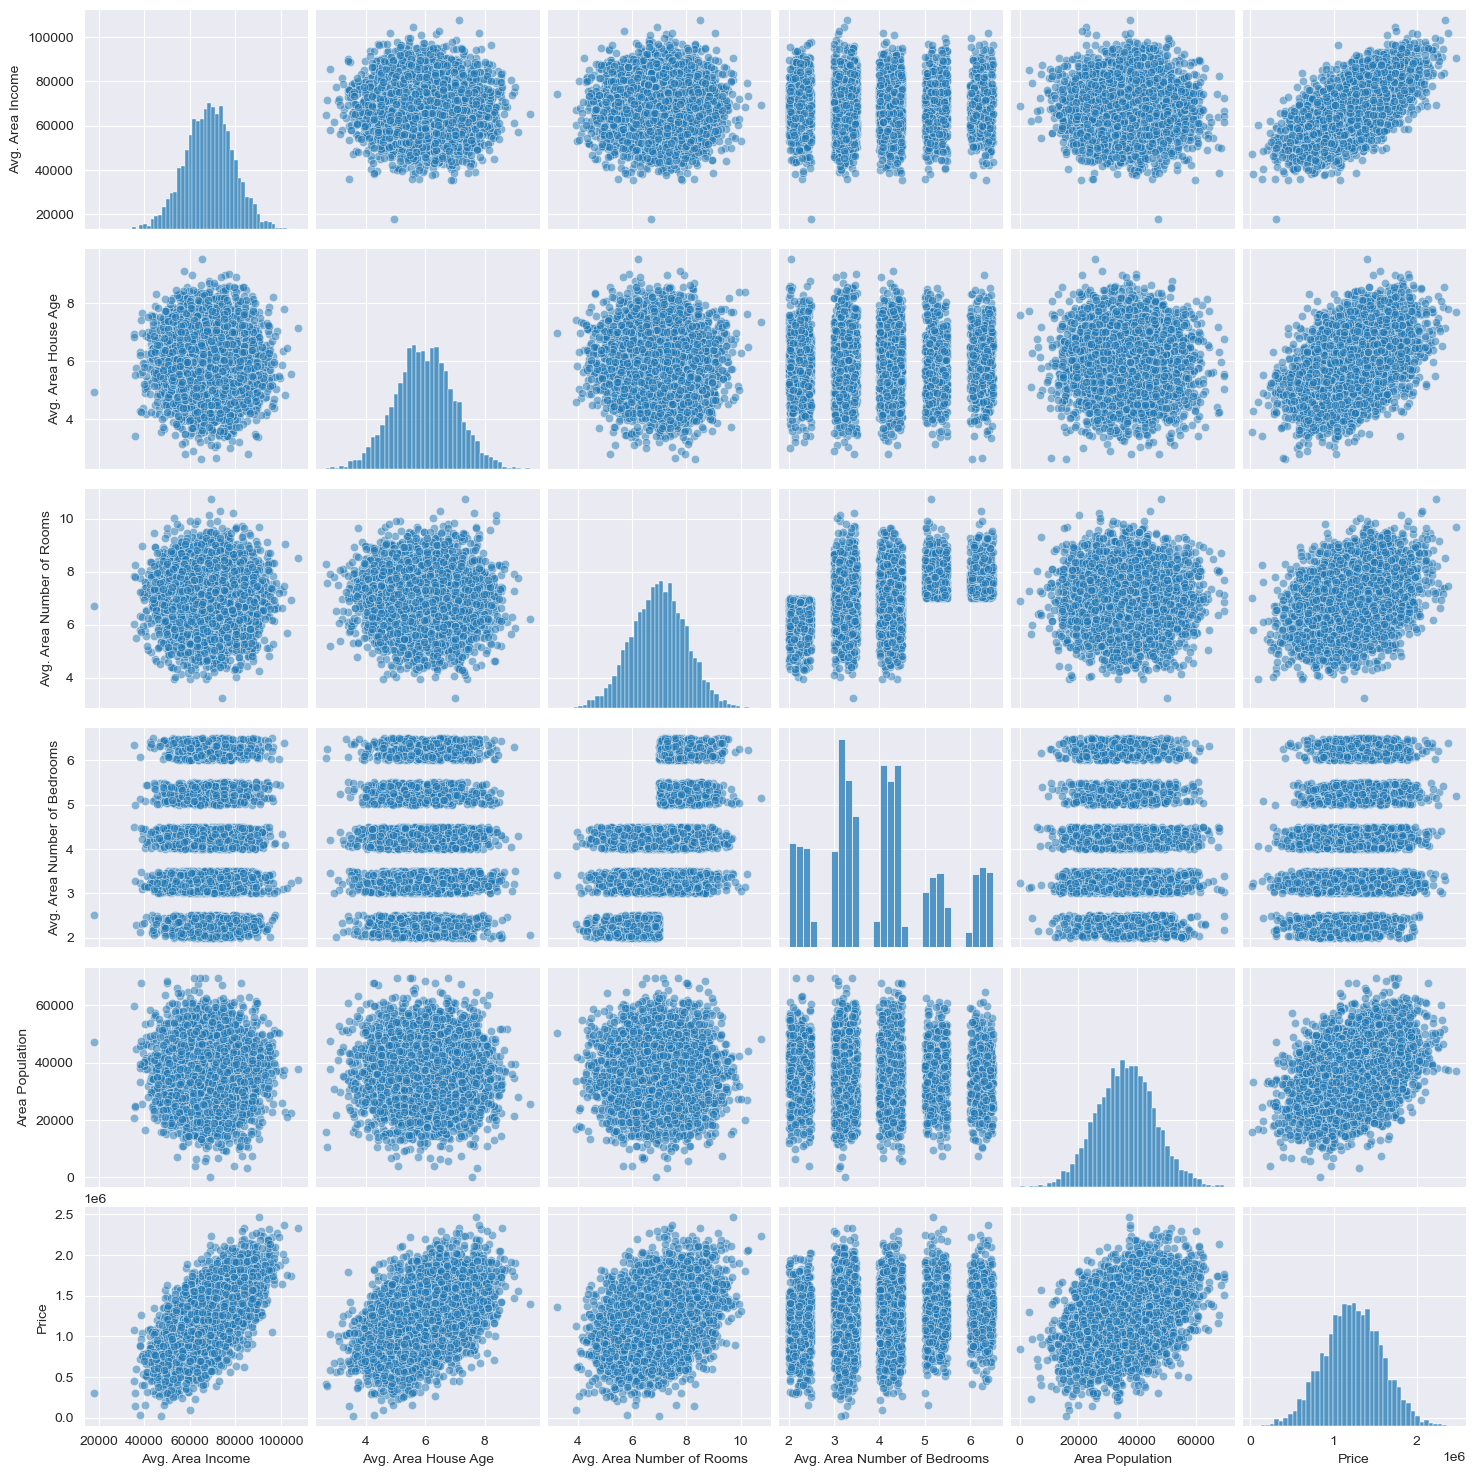

In [119]:
sns.pairplot(housing_data, plot_kws={'alpha': 0.5})
plt.show()

Taking a closer look at price

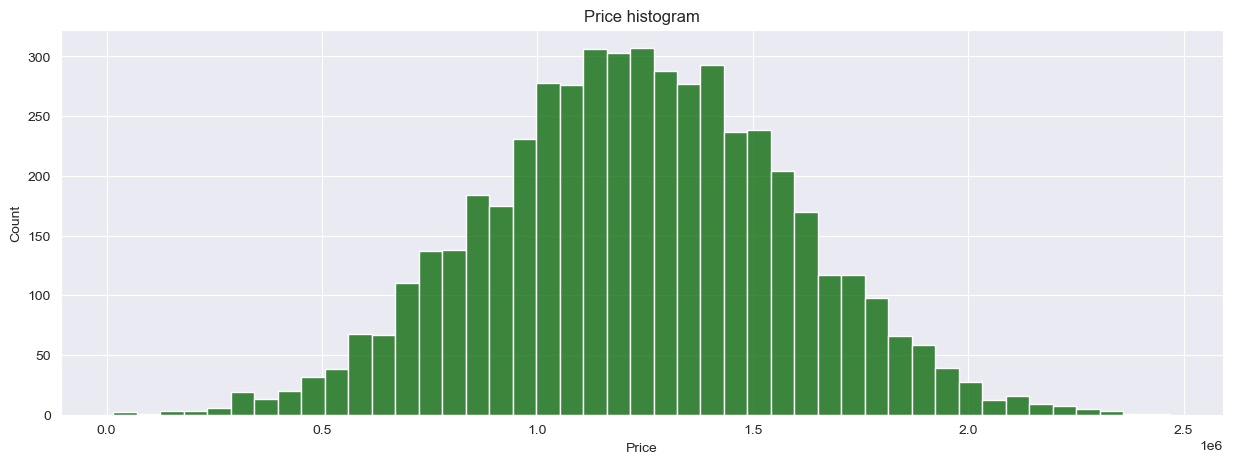

In [120]:
sns.histplot(housing_data['Price'], color='darkgreen')
plt.title('Price histogram')
plt.show()

In [121]:
housing_data['Price'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

A scatterplot of `Price` vs. `Avg. Area Income` shows a strong positive linear relationship between the two.

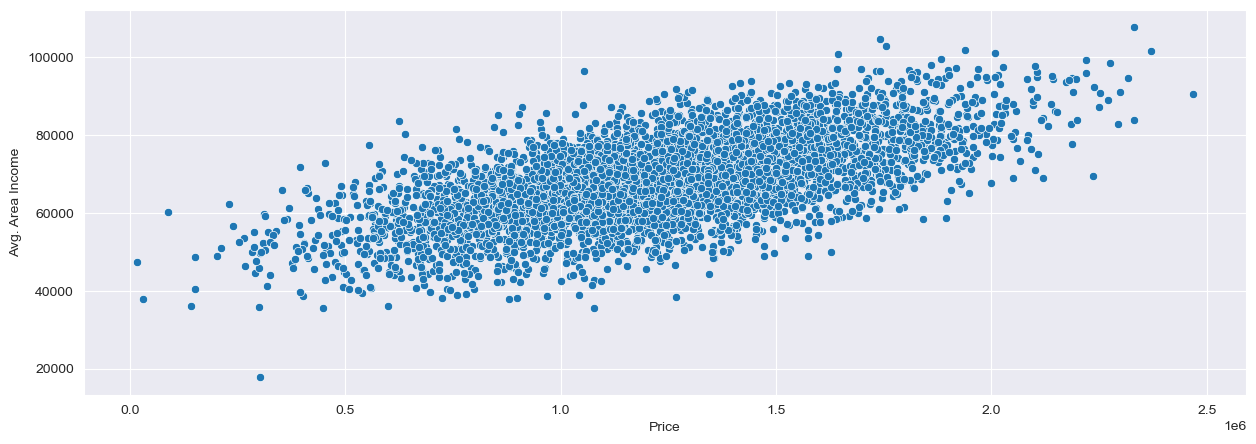

In [122]:
sns.scatterplot(x='Price', y='Avg. Area Income', data=housing_data)
plt.show()

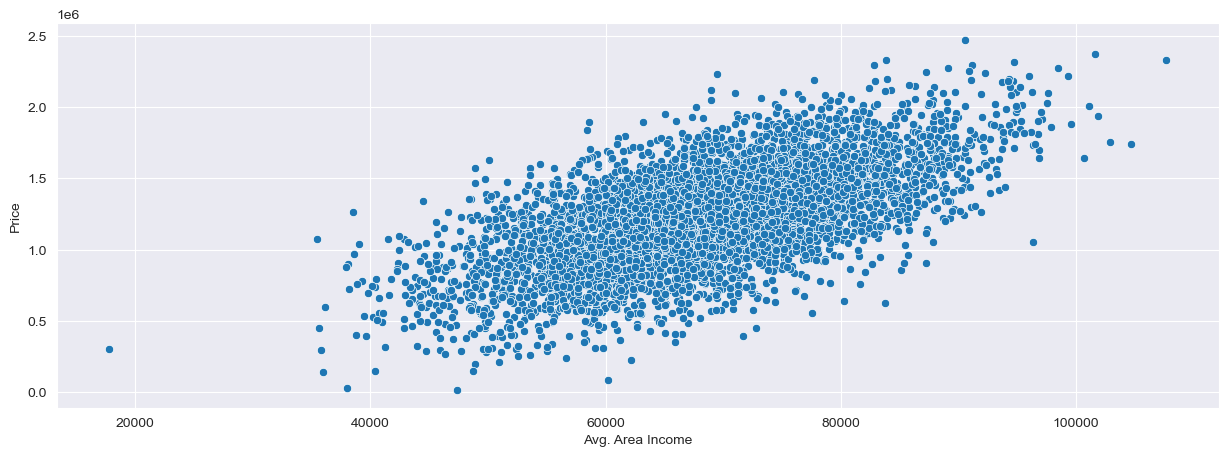

In [123]:
sns.scatterplot(x='Avg. Area Income', y='Price', data=housing_data)
plt.show()

- Kind of strong relationship between the house's age and its price

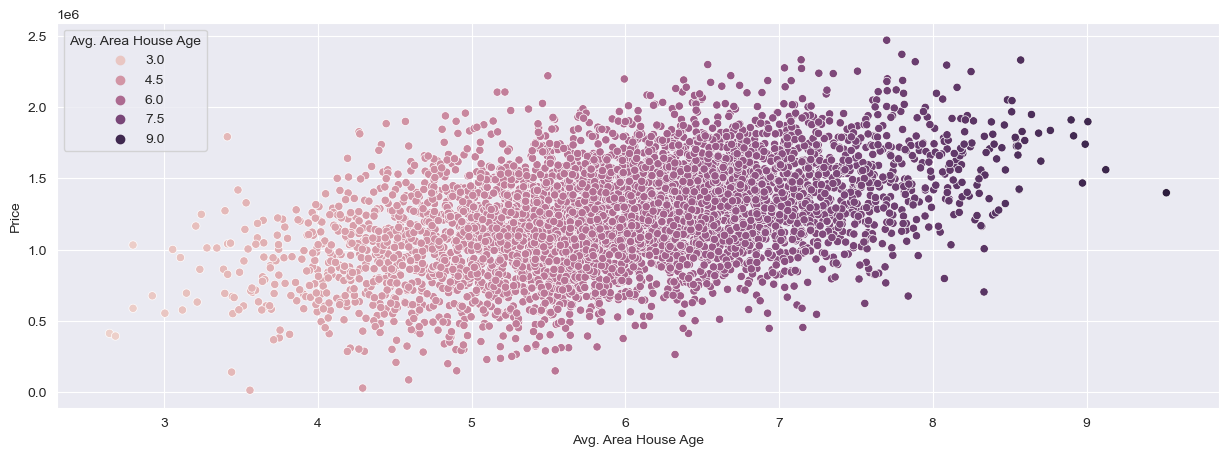

In [124]:
sns.scatterplot(x='Avg. Area House Age', y='Price', data=housing_data, hue='Avg. Area House Age')
plt.show()

- Same for the area population

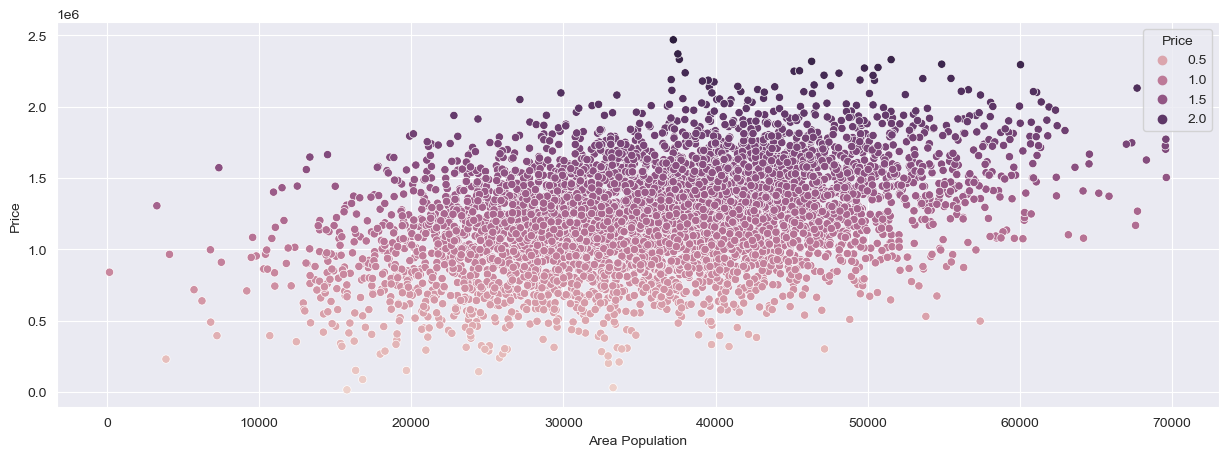

In [125]:
sns.scatterplot(x='Area Population', y='Price', data=housing_data, hue='Price')
plt.show()

A `boxplot` helps us check the median or any outliers

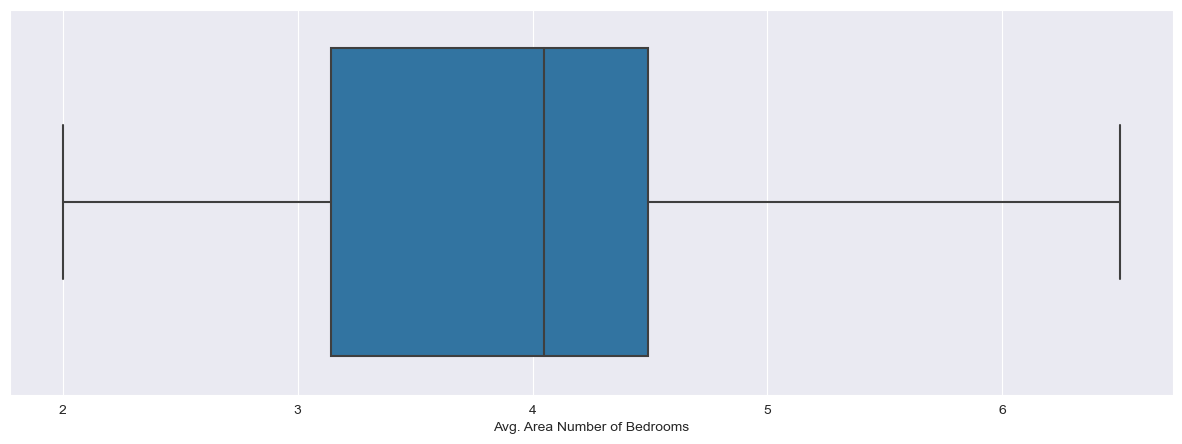

In [126]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

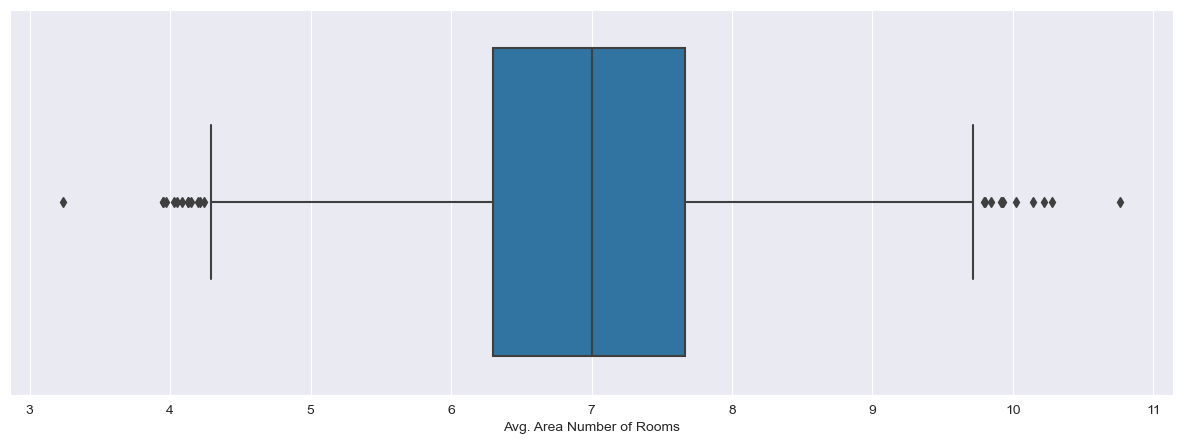

In [127]:
sns.boxplot(x='Avg. Area Number of Rooms', data=housing_data)
plt.show()

- There're a lot of outliers with average number of rooms.

Multicollinearity check (`heatmap`)

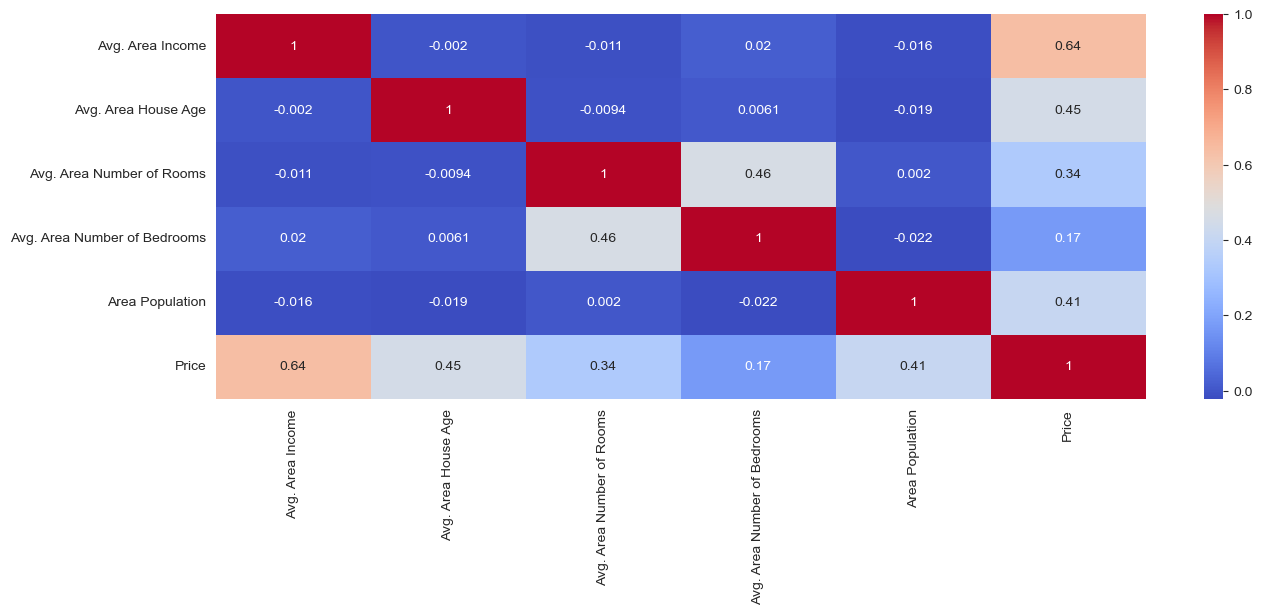

In [128]:
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.show()

No severe collinearity issues found.

## Train Test Split

Import `train_test_split`

In [129]:
from sklearn.model_selection import train_test_split

Split our data into training and testing sets.

In [130]:
# exclude Price and Address (for X)
X = housing_data.drop(['Price','Address'], axis=1)
# target variable
y = housing_data['Price']

# let's use test_size = 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Metrics

We'll take a look at some metric examples:
- __Mean Absolute Error__ (MAE)
- __Mean Squared Error__ (MSE)
- __Root Mean Squared Error__ (RMSE)

## Linear Regression

Import

In [131]:
# import LinearRegression model
from sklearn.linear_model import LinearRegression
# import metrics to use different metrics
from sklearn import metrics
# import r2_score to calculate r2 score
from sklearn.metrics import r2_score

In [132]:
lm = LinearRegression()
lm.fit(X_train,y_train)

# pass our X_test data through the model (lm) to get our predictions
predictions = lm.predict(X_test)

In [133]:
# using different metrics to calculate the error between y_test and predictions
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 Score: ', r2_score(y_test, predictions))

MAE: 79676.01220124548
MSE: 9766022404.780794
RMSE: 98823.18758662257
R2 Score:  0.91737387785691


Try on the training set

In [134]:
train_predictions = lm.predict(X_train)

In [135]:
print('MAE:', metrics.mean_absolute_error(y_train, train_predictions))
print('MSE:', metrics.mean_squared_error(y_train, train_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
print('R2 Score: ', r2_score(y_train, train_predictions))

MAE: 81792.28570000536
MSE: 10337775681.429188
RMSE: 101674.85274850014
R2 Score:  0.9181390620258809


## Ridge Regression

_Ignore warning messages for some deprecated features_

In [136]:
import warnings
warnings.filterwarnings('ignore')

`Ridge Regression` is a technique for analyzing multiple regression data that suffers from `multicollinearity`. When multicollinearity occurs, __least squares estimates are unbiased__, but their variances are large so they may be far from the true value. By adding a degree of bias to the regression estimates, ridge regression __reduces the standard errors__. It is hoped that the net effect will be to give estimates that are more reliable.

In [137]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.05, normalize = True)
ridge.fit(X_train, y_train)

predictions_ridge = ridge.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge)))
print('R2 Score: ', r2_score(y_test, predictions_ridge))

MAE: 80722.31101176949
MSE: 9891479819.780024
RMSE: 99455.91897810821
R2 Score:  0.9163124365386505


Let's try modify some parameters in `Ridge` model

In [138]:
# increase the alpha will result in stronger regularization, which can help to prevent overfitting
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(X_train, y_train)

predictions_ridge_test1 = ridge.predict(X_test)

# metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_ridge_test1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ridge_test1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ridge_test1)))
print('R2 Score: ', r2_score(y_test, predictions_ridge_test1))

MAE: 83120.12816282257
MSE: 10462838718.437141
RMSE: 102288.01845004693
R2 Score:  0.9114784142324069


## Lasso Regression

The “LASSO” stands for Least Absolute Shrinkage and Selection Operator. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The key difference to remember here is that Lasso shrinks the less important feature’s coefficient to zero, thus removing some feature altogether. So, this works well for feature selection in case we have a huge number of features.

In [139]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.05, normalize = True)
lasso.fit(X_train, y_train)

predictions_lasso = lasso.predict(X_test)

# printing metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso)))
print('R2 Score: ', r2_score(y_test, predictions_lasso))

MAE: 79675.77945707337
MSE: 9765950255.960384
RMSE: 98822.82254601103
R2 Score:  0.9173744882770996


Let's try modify some parameters in `Lasso` model

In [140]:
# increase the alpha will result in stronger regularization, which can help to prevent overfitting
lasso = Lasso(alpha = 0.5, normalize = True)
lasso.fit(X_train, y_train)

predictions_lasso_test1 = lasso.predict(X_test)

# metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lasso_test1))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lasso_test1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lasso_test1)))
print('R2 Score: ', r2_score(y_test, predictions_lasso_test1))

MAE: 79675.12043376845
MSE: 9765311898.62362
RMSE: 98819.59268598317
R2 Score:  0.9173798891444223


- As we can compare, the difference is really small in this case.